<img src="fond.PNG"
     alt="Markdown Monster icon" width="2000" />

## Objectifs :
    • Maitriser l’API de twitter pour l’extraction des tweets
    • Maitriser la partie NLP (natural language processing) avec NLTK en Python
    • Appliquer les principes de nettoyage des données
    • Classer les tweets : regrouper ensemble les tweets qui sont similaires. C’est une étape qui peutêtre considérée comme une étape 

## Specifications
lmaginons que vous avez un compte Twitter, et que vous lez suivre les tweets sur ce reseau social. Vu le nombre colossal de Tweets, et faute de temps, vous n'avez pas la possibilite de les lire tous. Pour cela, vous avez besoin d'une application qui va jouer le role d'assistantet qui va
vous effectuer un resume de toutes ces informations. Une des approches qu'on peut utiliser estde le classer sous former de groupes de sorte a ce qu'on presente a l'utilisateur un seul Tweet de
chaque groupe. Pour cela, on doit proceder en trois grandes etapes :


## Travail faire
On a Telecharger les tweets a partir de Twitter en utilisant l'API de twitter. Pour cela, vous devriez un compte « Twitter Developper ». Pour cela, vous devriez telecharger au moins 10 mille twwets. Pour la documentation de l'API de twitter, vous pouvez consulter les liens suivants :


In [1]:
import pandas as pd
import tweepy
consumer_key="LHZVzcEN30hfmN2cPBqkoB3wq"
consumer_secret="DGZ7gQFDlqXoPfmAUWHOsY2eMTA0qhgKVb3rbExcx8Vhav3x3a"
access_token="1325046107437752325-a2zNm36NnzJqTFBFkIagjzpkdCadjs"
access_token_secret="7ohQJ7WTf2DuHsr9NNwPkOPXq5zUkaycrzo2nPhPUoGLL"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [2]:
twitter_data_analysis = pd.DataFrame(columns = ['text'])
i=0

In [3]:
tweets = tweepy.Cursor(api. user_timeline , id="twitter").items( 15000)
# Iterate and print tweets
for tweet in tweets:
    twitter_data_analysis.loc[i,"text"] = tweet.text
    i+=1

In [4]:
print(twitter_data_analysis.shape)
print(twitter_data_analysis)

(3227, 1)
                                                   text
0     We’re switching back. You can now choose to Re...
1     RT @angnickelodeon: twitter users with 150-350...
2     @yaryoush_ @BeshoyMaximus1 the way you both won 💙
3     There’s more! We’ll also be testing sharing Tw...
4     Oh snap! 👻\n\nSharing Tweets directly to your ...
...                                                 ...
3222  @TheMegaBoi2004 Keeping your brain thinking ar...
3223  @GuillaumeTC @HamillHimself @ChrisEvans For th...
3224             @KSJIZE Hi @dog_rates you've got a fan
3225              @insomniacookies cc: @MeCookieMonster
3226  @MNoir1211 &amp; you're guaranteed a good morn...

[3227 rows x 1 columns]


In [5]:
tweets = tweepy.Cursor(api. user_timeline , id="twitter").items( 15000)
 #Iterate and print tweets
for tweet in tweets:
    twitter_data_analysis.loc[i,"text"] = tweet.text
    i+=1

In [6]:
print(twitter_data_analysis.shape)

(6454, 1)


In [7]:
tweets = tweepy.Cursor(api. user_timeline , id="twitter").items( 15000)
 #Iterate and print tweets
for tweet in tweets:
    twitter_data_analysis.loc[i,"text"] = tweet.text
    i+=1

In [8]:
print(twitter_data_analysis.shape)

(9681, 1)


In [9]:
import csv
twitter_data_analysis.to_csv('twitter_data_analysis.csv',index = False)
twitter_data_analysis.head(10)

,text
0,We’re switching back. You can now choose to Re...
1,RT @angnickelodeon: twitter users with 150-350...
2,@yaryoush_ @BeshoyMaximus1 the way you both won 💙
3,There’s more! We’ll also be testing sharing Tw...
4,Oh snap! 👻\n\nSharing Tweets directly to your ...
5,@levantinepali a stamp of approval https://t.c...
6,2020 in one word
7,@Astro_AJC this is what cuffing season means t...
8,@un3asyy 2 is also cute
9,@DeePeeArts you're all amazing


In [10]:
twitter_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 0 to 9680
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9681 non-null   object
dtypes: object(1)
memory usage: 471.3+ KB


## Pretraitement des tweets
Dans cette etape, l'objectif est d'eliminer le texte inutile des tweets tels que les #, les noms des utilisateurs, les url,emoji ...


In [11]:
import re
numbers = r'(?:(?:\d+,?)+(?:\.?\d+)?)'
URL = r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+'
html_tag = r'<[^>]+>'
hash_tag = r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)"
at_sign = r'(?:@[\w_]+)'
start_quest_pound = r"(?:^|\s)([#?])(\w+)" # Start with ? or with #
cont_number = r'(\w*\d\w*)' # Words containing numbers

short_words = r'\W*\b\w{1,3}\b' # Short words of 3 character or less

emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)



word_garb = ['here', 'there', 'where', 'when', 'would', 'should', 'could','thats', 'youre', 'thanks', 'hasn',\
             'thank', 'https', 'since', 'wanna', 'gonna', 'aint', 'http', 'unto', 'onto', 'into', 'havent',\
             'dont', 'done', 'cant', 'werent', 'https', 'u', 'isnt', 'go', 'theyre', 'each', 'every', 'shes', 'youve', 'youll',\
            'weve', 'theyve','that','this','thery','That','then','yor','what']

bad_chars = {';', ':', '!', "*",".","?",",",")","(","'","_"}

In [76]:
for index, row in twitter_data_analysis.iterrows():
    err = row['text']
    new0 = re.sub(URL, "", err)
    new1 = re.sub(hash_tag, "", new0)
    new2 = re.sub(at_sign, "", new1)
    new3 = re.sub(r"\n+", "", new2)
    new4 = re.sub(r"RT+", "", new3)
    new5 = re.sub("hhh+", '', new4)
    new6 = re.sub(numbers, "", new5)
    new7 = re.sub(html_tag, "", new6)
    new8 = re.sub(r'\W*\b\w{1,3}\b', "", new7)
    new9 = re.sub(emoji_pattern, "", new8)
    new10 = re.sub(short_words, "", new9)
    twitter_data_analysis.loc[index,'text'] =new10
    
    
    
    
twitter_data_analysis['text'] = twitter_data_analysis['text'].str.replace('|'.join(map(re.escape, word_garb)), '')
twitter_data_analysis['text'] = twitter_data_analysis['text'].str.replace('|'.join(map(re.escape, bad_chars)), '')



In [77]:
twitter_data_analysis.head(40)

,text
0,switching back choose Retweet Qote Tweet before
1,twitter sers with - followers backbone society
2,both
3,more also testing sharing Tweets Stories smal...
4,snap Sharing Tweets directly Snapchat Stories...
5,stamp approval
6,word
7,cffing season means
8,also
9,amazing


In [78]:
twitter_data_analysis.to_csv('cleaning_twitter_data_analysis.csv',index = False)

In [79]:
import nltk 
nltk.download('stopwords' )

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nidhal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

(-0.5, 799.5, 399.5, -0.5)

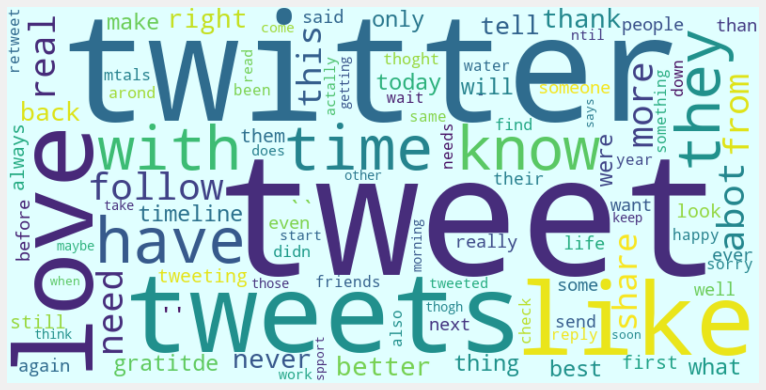

In [80]:
import matplotlib.pyplot as plt
import nltk
import matplotlib
from wordcloud import WordCloud

txt = twitter_data_analysis.text.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)
wc = WordCloud(width=800, height=400, max_words=100,background_color = 'lightcyan').generate_from_frequencies(word_dist)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,30))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.savefig('d:/temp/result.png')



All frequencies, including STOPWORDS:
        mots  frequence
0      tweet        651
1    twitter        495
2     tweets        270
3       love        252
4       like        249
5       have        216
6       time        210
7       know        198
8       they        195
9       with        192
10    follow        150
11      abot        150
12      real        132
13      need        129
14      more        126
15      from        120
16      this        114
17     share        108
18     right        105
19    better        105
20     never        102
21     thank        102
22      back         93
23      tell         93
24  gratitde         90
25        ''         87
26     today         84
27     thing         84
28        ``         84
29  timeline         84
30      what         84
31      will         81
32      only         81
33      best         81
34      make         78
35      were         75
36  tweeting         75
37     still         75
38      look         72
39

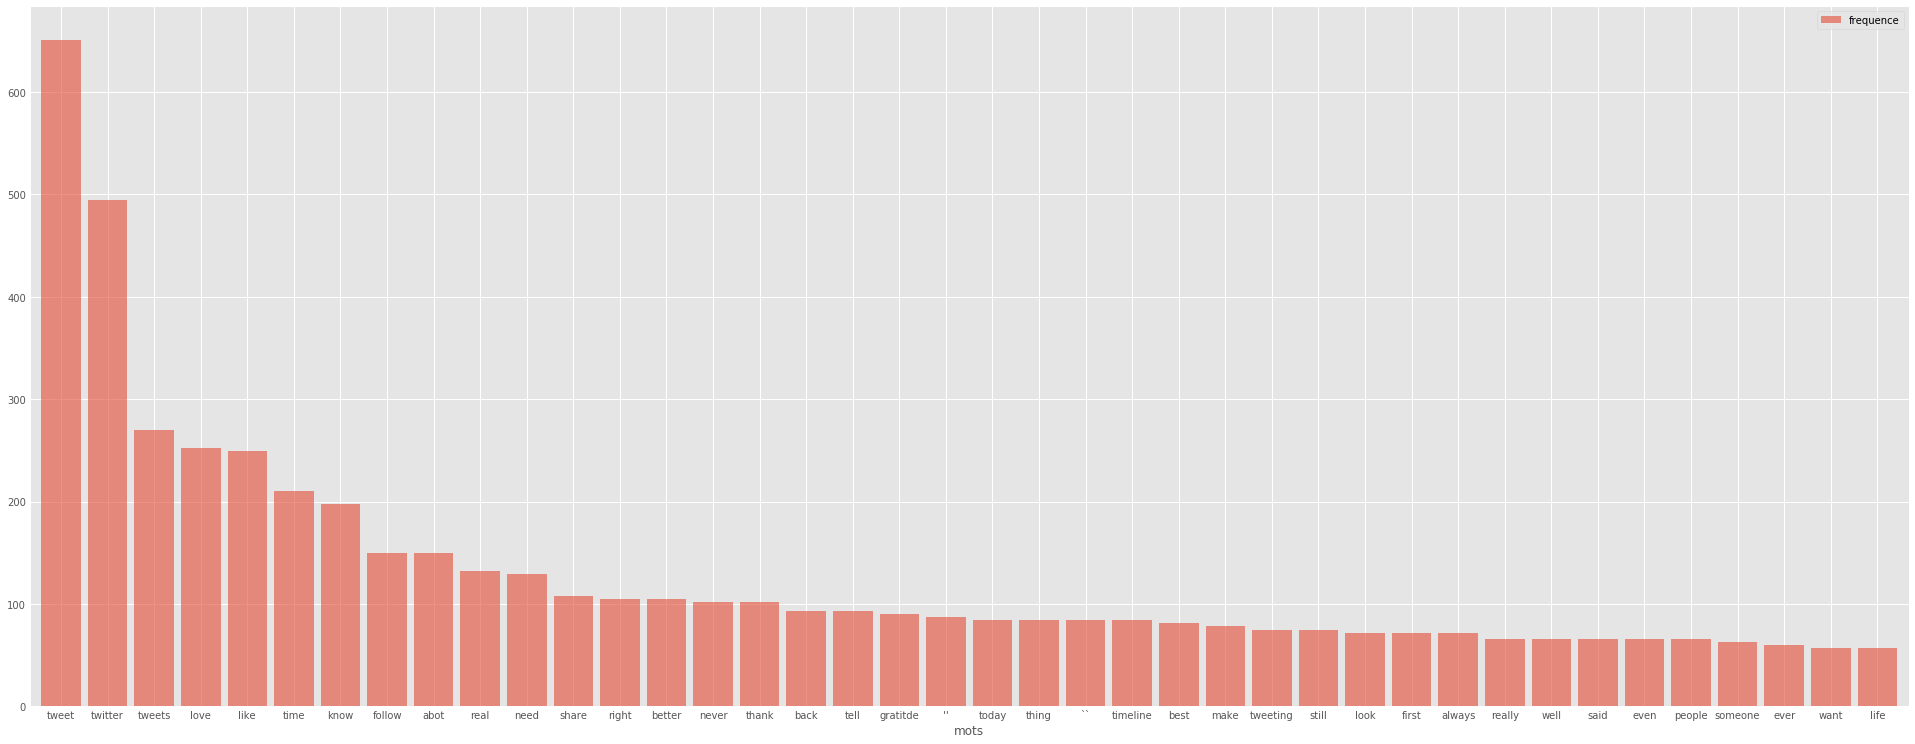

In [81]:

top_N = 40


stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['mots', 'frequence'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['mots', 'frequence']).set_index('mots')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0,width=0.85, alpha=0.6, figsize=(30,12))

## Traitement des tweets: NLP (Natural LanguageProcessing)
On doit proceder a !'analyse du tweet en respectant les differentes etapes du NLP (Natural LanguageProcessing). La bibliotheque a utiliser est NLTK en Python.


In [64]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer() 
stemed_dataset=[]
for i in range(0,twitter_data_analysis.shape[0]):
    stemmed_array=twitter_data_analysis['text'][i].split()
    stemmed=[ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed=' '.join(stemmed)
    stemed_dataset.append(stemmed)

print(stopwords.words('english'))
print("--"*60)
print(stemed_dataset[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(stemed_dataset)
#print(cv.get_feature_names())
print(X)
pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

  (0, 1996)	1
  (0, 120)	1
  (0, 338)	1
  (0, 1663)	1
  (0, 1581)	1
  (0, 2163)	1
  (1, 2171)	1
  (1, 1772)	1
  (1, 763)	1
  (1, 121)	1
  (1, 1871)	1
  (3, 2163)	1
  (3, 60)	1
  (3, 2038)	1
  (3, 1787)	1
  (3, 1970)	1
  (3, 1849)	1
  (3, 1056)	1
  (4, 2163)	1
  (4, 1787)	1
  (4, 1970)	1
  (4, 1860)	1
  (4, 543)	1
  (4, 2333)	1
  (4, 1861)	1
  :	:
  (9670, 2163)	1
  (9670, 541)	1
  (9671, 1129)	1
  (9671, 2072)	1
  (9671, 1086)	1
  (9672, 2063)	1
  (9672, 1554)	1
  (9672, 1159)	1
  (9673, 2171)	1
  (9673, 1347)	1
  (9675, 120)	1
  (9675, 386)	1
  (9676, 1056)	1
  (9676, 2333)	1
  (9676, 238)	1
  (9676, 2056)	1
  (9676, 95)	1
  (9677, 51)	1
  (9677, 2272)	1
  (9677, 385)	1
  (9680, 2163)	1
  (9680, 1370)	2
  (9680, 1280)	1
  (9680, 1335)	1
  (9680, 804)	1


,abbot,abl,abort,abot,absolt,accent,accept,access,accidentally,accomplish,...,york,yorself,yothank,yo¹⁰⁰⁰⁰,zeke,zero,zola,zoom,ʸᵒᵒⁿᵍᶦ,ᵗᶦⁿʸ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Classification des tweets
Etant donne un ensemble de tweets, l'objectif est de les resumer sous formes de groupes de sorte
a ce que les Tweets qui sont dans le meme groupe soient similaires. Ainsi, l'utilisateur pourra par la suite lire juste un Tweet de chaque groupe (le Tweet qui est le centro"ide de groupes).
on a Utiliser l'algorithme K-Means pour classer les Tweets en k classes ,valeurs de k allant de 1 a30 par exemple).


In [20]:
from sklearn.cluster import KMeans
wcss=[]

In [21]:
for i in range(1,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration  0, inertia 64968.000
Iteration  1, inertia 26127.983
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 36105.000
Iteration  1, inertia 26127.983
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 36105.000
Iteration  1, inertia 26127.983
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 45780.000
Iteration  1, inertia 26127.983
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 45738.000
Iteration  1, inertia 26127.983
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 64770.000
Iteration  1, inertia 26127.983
Converged at iteration 1: center shift 0.000000e+00 within tol

Iteration  1, inertia 25876.738
Iteration  2, inertia 25799.258
Iteration  3, inertia 25764.854
Converged at iteration 3: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 35991.000
Iteration  1, inertia 25909.097
Iteration  2, inertia 25829.014
Iteration  3, inertia 25781.759
Converged at iteration 3: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 26322.000
Iteration  1, inertia 25382.951
Iteration  2, inertia 25381.279
Converged at iteration 2: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 34716.000
Iteration  1, inertia 24899.468
Iteration  2, inertia 24707.015
Iteration  3, inertia 24438.927
Converged at iteration 3: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 35634.000
Iteration  1, inertia 25414.346
Iteration  2, inertia 25263.123
Iteration  3, inertia 24987.412


Iteration  2, inertia 24572.876
Iteration  3, inertia 24517.839
Iteration  4, inertia 24456.374
Iteration  5, inertia 24440.410
Iteration  6, inertia 24415.535
Iteration  7, inertia 24407.640
Converged at iteration 7: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 35088.000
Iteration  1, inertia 24974.516
Iteration  2, inertia 24740.774
Iteration  3, inertia 24587.375
Iteration  4, inertia 24156.085
Iteration  5, inertia 24155.687
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 35538.000
Iteration  1, inertia 25476.855
Iteration  2, inertia 25473.351
Converged at iteration 2: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 26130.000
Iteration  1, inertia 25130.140
Iteration  2, inertia 24684.774
Iteration  3, inertia 24440.508
Iteration  4, inertia 24134.384
Iteration  5, inertia 24134.056
Converged 

Iteration  2, inertia 24036.380
Iteration  3, inertia 23859.102
Iteration  4, inertia 23697.208
Iteration  5, inertia 23677.969
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 26010.000
Iteration  1, inertia 24827.290
Iteration  2, inertia 24590.387
Iteration  3, inertia 24400.445
Iteration  4, inertia 24006.292
Iteration  5, inertia 24005.893
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 35253.000
Iteration  1, inertia 25179.032
Iteration  2, inertia 25174.371
Converged at iteration 2: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 25068.000
Iteration  1, inertia 24243.451
Iteration  2, inertia 24143.698
Iteration  3, inertia 23913.535
Iteration  4, inertia 23613.947
Iteration  5, inertia 23613.614
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151

Iteration  2, inertia 23460.159
Iteration  3, inertia 23288.938
Iteration  4, inertia 23126.171
Iteration  5, inertia 23106.933
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 25410.000
Iteration  1, inertia 24241.939
Iteration  2, inertia 24009.472
Iteration  3, inertia 23851.971
Iteration  4, inertia 23422.616
Iteration  5, inertia 23422.216
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 25875.000
Iteration  1, inertia 24936.111
Iteration  2, inertia 24863.167
Iteration  3, inertia 24322.904
Iteration  4, inertia 24308.731
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 24930.000
Iteration  1, inertia 24067.692
Iteration  2, inertia 23973.951
Iteration  3, inertia 23747.652
Iteration  4, inertia 23469.633
Iteration  5, inertia 23468.839
Converged 

Iteration  2, inertia 23756.187
Iteration  3, inertia 23748.427
Converged at iteration 3: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 25020.000
Iteration  1, inertia 23394.784
Iteration  2, inertia 23269.568
Iteration  3, inertia 23264.179
Iteration  4, inertia 23256.740
Iteration  5, inertia 23253.071
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 25299.000
Iteration  1, inertia 24160.378
Iteration  2, inertia 23890.826
Iteration  3, inertia 23718.168
Iteration  4, inertia 23299.983
Iteration  5, inertia 23299.573
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 25812.000
Iteration  1, inertia 24810.025
Iteration  2, inertia 24441.178
Iteration  3, inertia 23965.743
Iteration  4, inertia 23669.508
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.151

Iteration  0, inertia 24906.000
Iteration  1, inertia 23541.466
Iteration  2, inertia 22807.005
Iteration  3, inertia 22794.779
Iteration  4, inertia 22792.766
Iteration  5, inertia 22787.227
Iteration  6, inertia 22738.112
Iteration  7, inertia 22691.035
Converged at iteration 7: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 25479.000
Iteration  1, inertia 24059.929
Iteration  2, inertia 23467.696
Iteration  3, inertia 23461.639
Iteration  4, inertia 23460.449
Iteration  5, inertia 23458.825
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 24828.000
Iteration  1, inertia 23016.725
Iteration  2, inertia 22793.087
Iteration  3, inertia 22300.465
Iteration  4, inertia 22291.463
Iteration  5, inertia 22287.794
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 24969.000
Iteration 

Initialization complete
Iteration  0, inertia 24846.000
Iteration  1, inertia 23928.369
Iteration  2, inertia 23126.543
Iteration  3, inertia 22671.256
Iteration  4, inertia 22625.944
Iteration  5, inertia 22625.440
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 24873.000
Iteration  1, inertia 23774.476
Iteration  2, inertia 23713.224
Iteration  3, inertia 23696.927
Iteration  4, inertia 23691.697
Converged at iteration 4: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 24726.000
Iteration  1, inertia 24109.539
Iteration  2, inertia 23949.674
Iteration  3, inertia 23648.790
Iteration  4, inertia 23540.501
Iteration  5, inertia 23527.632
Iteration  6, inertia 23505.719
Iteration  7, inertia 23504.958
Iteration  8, inertia 23502.139
Iteration  9, inertia 23501.514
Converged at iteration 9: center shift 0.000000e+00 within tolerance 1.151405e-07
Initializa

Iteration  3, inertia 22202.048
Iteration  4, inertia 22122.978
Iteration  5, inertia 22121.100
Iteration  6, inertia 22111.371
Iteration  7, inertia 22094.447
Iteration  8, inertia 22034.650
Iteration  9, inertia 21986.643
Converged at iteration 9: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 24921.000
Iteration  1, inertia 23320.002
Iteration  2, inertia 22843.164
Iteration  3, inertia 22442.163
Iteration  4, inertia 22434.278
Iteration  5, inertia 22433.351
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 24660.000
Iteration  1, inertia 24192.548
Iteration  2, inertia 24164.377
Iteration  3, inertia 24137.792
Iteration  4, inertia 23976.472
Iteration  5, inertia 23833.606
Iteration  6, inertia 23537.795
Iteration  7, inertia 23537.533
Converged at iteration 7: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration 

Iteration  1, inertia 23316.792
Iteration  2, inertia 22672.201
Iteration  3, inertia 22366.955
Iteration  4, inertia 22366.610
Iteration  5, inertia 22366.348
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 24672.000
Iteration  1, inertia 23254.795
Iteration  2, inertia 22781.076
Iteration  3, inertia 22133.275
Iteration  4, inertia 22032.011
Iteration  5, inertia 22027.995
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 24465.000
Iteration  1, inertia 23503.621
Iteration  2, inertia 22869.345
Iteration  3, inertia 22728.787
Iteration  4, inertia 22558.278
Iteration  5, inertia 22174.881
Iteration  6, inertia 22161.875
Converged at iteration 6: center shift 0.000000e+00 within tolerance 1.151405e-07
Initialization complete
Iteration  0, inertia 24447.000
Iteration  1, inertia 23382.381
Iteration  2, inertia 22258.878
Iteration 

# Within-Cluster-Sum-of-Squares (WCSS)
<img src="cluster.PNG"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

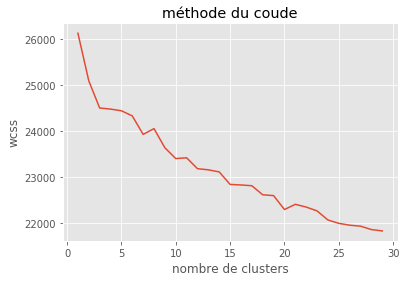

In [22]:

import matplotlib.pyplot as plt
plt.plot(range(1,30),wcss)
plt.title('méthode du coude')
plt.xlabel('nombre de clusters')
plt.ylabel('wcss')
plt.show()

In [23]:
import numpy as np
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)
centroids = Kmeans.cluster_centers_
kmeans_labels = Kmeans.labels_
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)


Cluster labels
[17  0  0 ...  0  0 26]

 Cluster Centroids
[[0.00079777 0.00039888 0.00039888 ... 0.00039888 0.00039888 0.00039888]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


##### La cellule suivante contient les mots cles de chaque cluster

In [51]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(order_centroids):
        print("cluster #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[- n_top_words - 1:][::-1]]))
        print("\n")
    print()

In [69]:
tf_feature_names = cv.get_feature_names()
print_top_words(Kmeans, tf_feature_names, 20)

cluster #0:
nderstand soft readi reader read thanksgiv reaction react bottl flirt third thirsti reac rdolph rdd rbber aditorim astronom razzl takeseveryon rate


cluster #1:
ad lot proof propos prose protect protein prove promis prrfect psh ptting qadrpl qalifi qaliti qeen pset profil profici professor prevent


cluster #2:
bro sre rearrang realli realiti real readi reader read reaction abot react reac rdolph rdd rbber razzl ball raven rate rat


cluster #3:
month thirteen replac repeat renew renesme remov remix ankl remind abbot rememb remast remain reliabl reli releas cermak relax reject recip


cluster #4:
becas stck prose protect protein prove prrfect pset propos psh abort qadrpl qalifi qaliti qeen qestion qick ptting proof promis profil


cluster #5:
accrat select propos prose protect protein prove prrfect proof pset ptting qadrpl qalifi qaliti qeen qestion psh promis profil profici pride


cluster #6:
accrat stdi propos prose protect protein prove prrfect proof pset ptting qadrpl

On a choisir un Tweet par classe comme representant. Les tweets choisis seront les resumes de toutes les informations contenues dans les tweets.

In [25]:
result_final_twitter_data_analysis = pd.DataFrame(columns = [ 'text'])
i=0
j=0
while i<30:
    while True: 
        Y=cv.transform([stemed_dataset[j]])
        prediction=Kmeans.predict(Y)
        if i == prediction:
            print("tweet of cluster "+str(prediction)+twitter_data_analysis.loc[j,"text"])
            result_final_twitter_data_analysis.loc[i,"text"] =twitter_data_analysis.loc[j,"text"]
            j=0
            break
        j+=1
    i+=1
result_final_twitter_data_analysis.to_csv('result_final_twitter_data_analysis.csv',index = False )

tweet of cluster [0]  twitter sers with - followers backbone society
tweet of cluster [1]  Tweet even load  lcky gess
tweet of cluster [2] thing didn Tweet wanted didn close  were like have place… 
tweet of cluster [3] jst make sre yor open
tweet of cluster [4] voices conversations yor Timeline sing Lists make List discover Lists… 
tweet of cluster [5] Thank mch  love share gratitde Follow
tweet of cluster [6] ing twitter headqarters will replacing one mst risk…
tweet of cluster [7] mtals short mtal weirdness
tweet of cluster [8] jst said wants help make twitter accont wants follow  
tweet of cluster [9] bother bother bother bother bother bother bother
tweet of cluster [10] streaming back door from yor stream back door
tweet of cluster [11] jst tta mte  mte away
tweet of cluster [12] miss Tweets abot yor Tweet Retweets with comments place 
tweet of cluster [13] Mte "boyfriend girlfriend partner anniversary proposed engaged hsband wife wedding" forever
tweet of cluster [14] thoght abot 

## conclusion :
#### on a charge les tweets d'apres l'api de twitter, on les a mis dans le fichier csv twitter_data_analysis. puis on a fait le data cleaning et on a mis le resultat dans le fichier cleaning_twitter_data_analysis.csv.Et enfin on a mis un tweet de chaque cluster dans le fichier result_final_twitter_data_analysis.



# [lien github](https://github.com/hazbri/projectDataMining/)